# Pokemon

This example uses the 'pokemon' and 'combats' datasets to predict the winner of a 1-on-1 Pokemon battle. You can download the Jupyter Notebook of the study <a href="pokemon.ipynb">here</a> and two datasets:

<a href="../../data/pokemon/pokemon.csv">pokemon</a>
<ul class="ul_content">
    <li><b>Name:</b> The name of the Pokemon</li>
    <li><b>Generation:</b> Pokemon's generation</li>
    <li><b>Legendary:</b> True if the Pokemon is legendary</li>
    <li><b>HP:</b> Number of hit points</li>
    <li><b>Attack:</b> Attack stat</li>
    <li><b>Sp_Atk:</b> Special attack stat</li>
    <li><b>Defense:</b> Defense stat</li>
    <li><b>Sp_Def:</b> Special defense stat</li>
    <li><b>Speed:</b></li> Speed stat
    <li><b>Type_1:</b> Pokemon's first type</li>
    <li><b>Type_2:</b> Pokemon's second type</li>
</ul>

<a href="../../data/pokemon/combats.csv">combats</a>
<ul class="ul_content">
    <li><b>First_pokemon:</b> Pokemon of trainer 1</li>
    <li><b>Second_pokemon:</b> Pokemon of trainer 2</li>
    <li><b>Winner:</b> Winner of the battle</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [15]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [1]:
vp.connect("VerticaDSN")

Let's ingest the datasets.

,123First_pokemonInt,123Second_pokemonInt,123WinnerInt
1,1,6,6
2,1,26,26
3,1,37,37
4,1,43,43
5,1,54,54

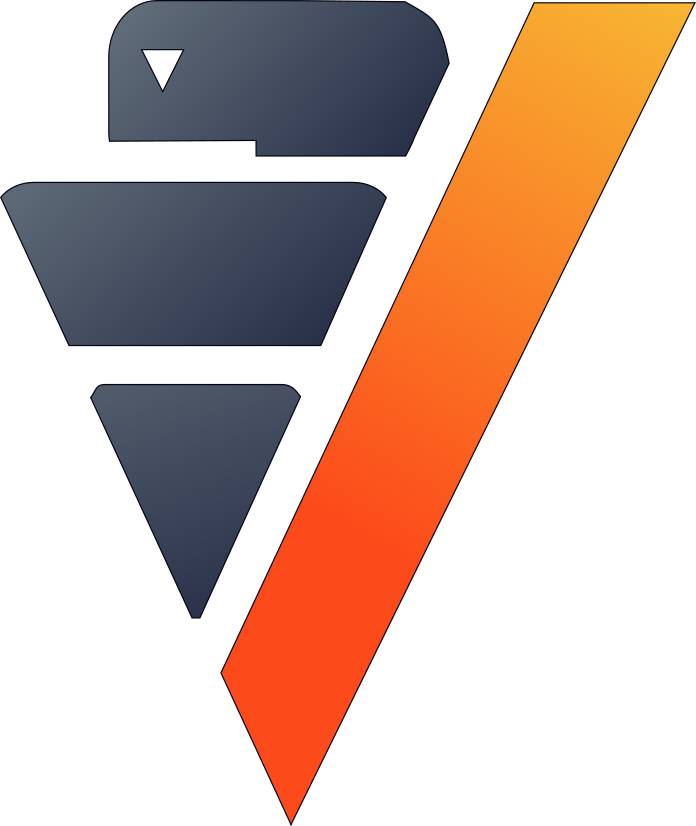

In [2]:
import verticapy.stats as st
vp.drop('combats')
combats = vp.read_csv('data/combats.csv')
combats.head(5)

,123IDInt,AbcNameVarchar(50),AbcType_1Varchar(20),AbcType_2Varchar(20),123HPInt,123AttackInt,123DefenseInt,123Sp_AtkInt,123Sp_DefInt,123SpeedInt,123GenerationInt,010LegendaryBoolean
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,❌
2,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,❌
3,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,❌
4,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,❌
5,5,Charmander,Fire,[null],39,52,43,60,50,65,1,❌

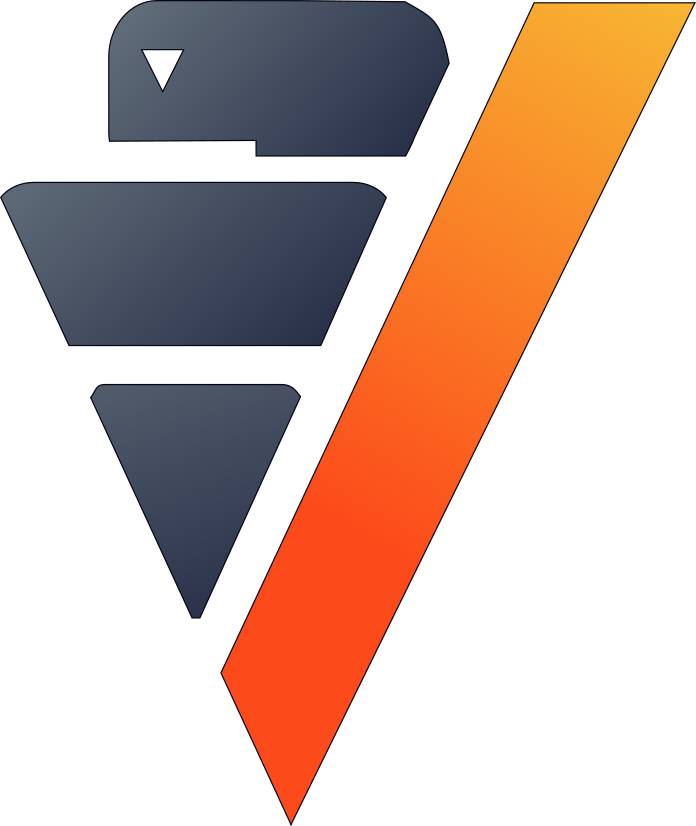

In [4]:
vp.drop('pokemon')
pokemon = vp.read_csv('data/pokemon.csv')
pokemon.head(5)

## Data Exploration and Preparation

The table 'combats' will be joined to the table 'pokemon' to predict the winner. 

The 'pokemon' table contains the information on each Pokemon. Let's describe this table.

,dtype,count,top,top_percent,unique
"""ID""",int,800,1,0.125,800.0
"""Name""",varchar(50),799,Deino,0.125,799.0
"""Type_1""",varchar(20),800,Water,14.0,18.0
"""Type_2""",varchar(20),414,[null],48.25,18.0
"""HP""",int,800,60,8.375,94.0
"""Attack""",int,800,100,5.0,111.0
"""Defense""",int,800,70,6.75,103.0
"""Sp_Atk""",int,800,60,6.375,105.0
"""Sp_Def""",int,800,80,6.5,92.0
"""Speed""",int,800,50,5.75,108.0

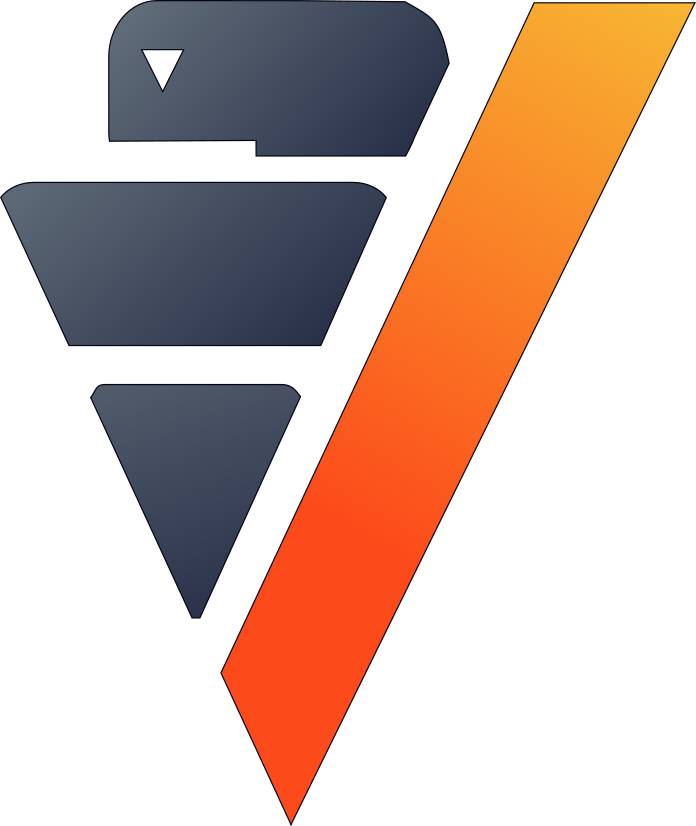

In [5]:
pokemon.describe(method = "categorical", unique = True)

The pokemon's 'Name', 'Generation', and whether or not it's 'Legendary' will never influence the outcome of the battle, so we can drop these columns.

,123IDInt,AbcType_1Varchar(20),AbcType_2Varchar(20),123HPInt,123AttackInt,123DefenseInt,123Sp_AtkInt,123Sp_DefInt,123SpeedInt
1,1,Grass,Poison,45,49,49,65,65,45
2,2,Grass,Poison,60,62,63,80,80,60
3,3,Grass,Poison,80,82,83,100,100,80
4,4,Grass,Poison,80,100,123,122,120,80
5,5,Fire,[null],39,52,43,60,50,65
6,6,Fire,[null],58,64,58,80,65,80
7,7,Fire,Flying,78,84,78,109,85,100
8,8,Fire,Dragon,78,130,111,130,85,100
9,9,Fire,Flying,78,104,78,159,115,100
10,10,Water,[null],44,48,65,50,64,43

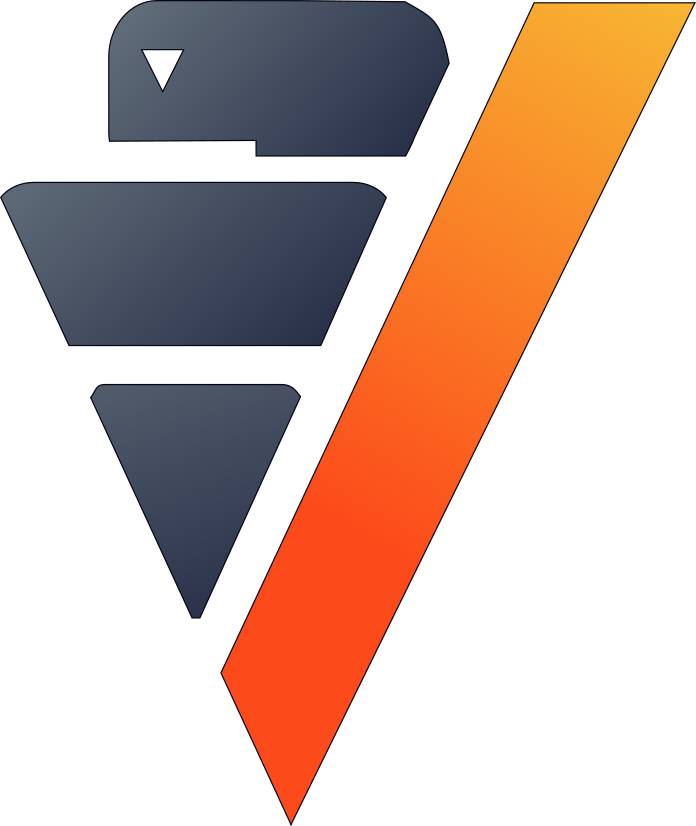

In [6]:
pokemon.drop(["Generation", 
              "Legendary", 
              "Name"])

The 'ID' will be the key to join the data. By joining the data, we will be able to create more relevant features.

In [7]:
fights = pokemon.join(combats, 
                      on = {"ID": "First_Pokemon"}, 
                      how = "inner",
                      expr1 = ["Sp_Atk AS Sp_Atk_1", 
                               "Speed AS Speed_1", 
                               "Sp_Def AS Sp_Def_1", 
                               "Defense AS Defense_1", 
                               "Type_1 AS Type_1_1", 
                               "Type_2 AS Type_2_1", 
                               "HP AS HP_1", 
                               "Attack AS Attack_1"],
                      expr2 = ["First_Pokemon", 
                               "Second_Pokemon", 
                               "Winner"]).join(pokemon, 
                      on = {"Second_Pokemon": "ID"}, 
                      how = "inner",
                      expr2 = ["Sp_Atk AS Sp_Atk_2", 
                               "Speed AS Speed_2", 
                               "Sp_Def AS Sp_Def_2", 
                               "Defense AS Defense_2", 
                               "Type_1 AS Type_1_2", 
                               "Type_2 AS Type_2_2", 
                               "HP AS HP_2", 
                               "Attack AS Attack_2"],
                      expr1 = ["Sp_Atk_1", 
                               "Speed_1", 
                               "Sp_Def_1", 
                               "Defense_1", 
                               "Type_1_1", 
                               "Type_2_1", 
                               "HP_1", 
                               "Attack_1", 
                               "Winner", 
                               "Second_pokemon"])

Features engineering is the key. Here, we can create features that describe the stat differences between the first and second Pokemon. We can also change 'winner' to a binary value: 1 if the first pokemon won and 0 otherwise.

,123Sp_Atk_diffInteger,123Speed_diffInteger,123Sp_Def_diffInteger,123Defense_diffInteger,123HP_diffInteger,123Attack_diffInteger,AbcType_1_1Varchar(20),AbcType_1_2Varchar(20),AbcType_2_1Varchar(20),AbcType_2_2Varchar(20),123WinnerInteger
1,-15,-35,0,-9,-13,-15,Grass,Fire,Poison,[null],0
2,15,-52,-5,-11,-10,-32,Grass,Normal,Poison,[null],0
3,-10,-31,-20,-38,-45,-43,Grass,Poison,Poison,Ground,0
4,15,-20,0,9,7,8,Grass,Fire,Poison,[null],0
5,25,0,10,-1,-15,-6,Grass,Bug,Poison,Poison,0
6,0,-10,-20,-31,-45,-81,Grass,Fighting,Poison,[null],0
7,0,-10,-20,-31,-45,-81,Grass,Fighting,Poison,[null],0
8,0,-45,0,-6,-5,-36,Grass,Fire,Poison,[null],0
9,-60,-10,0,-36,-50,-46,Grass,Grass,Poison,Psychic,0
10,30,-42,-45,-4,-5,-71,Grass,Fighting,Poison,[null],0

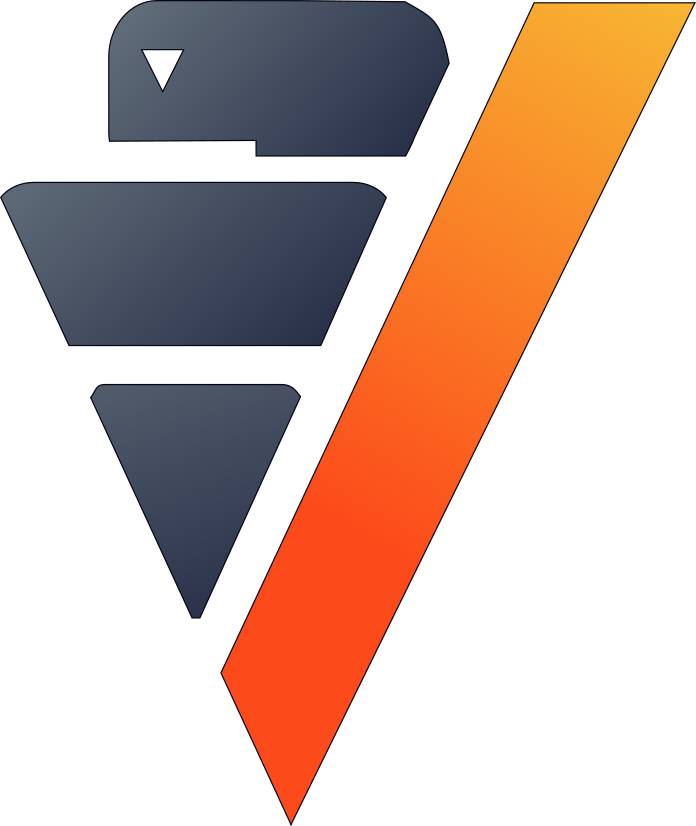

In [8]:
fights["Sp_Atk_diff"] = fights["Sp_Atk_1"] - fights["Sp_Atk_2"]
fights["Speed_diff"] = fights["Speed_1"] - fights["Speed_2"]
fights["Sp_Def_diff"] = fights["Sp_Def_1"] - fights["Sp_Def_2"]
fights["Defense_diff"] = fights["Defense_1"] - fights["Defense_2"]
fights["HP_diff"] = fights["HP_1"] - fights["HP_2"]
fights["Attack_diff"] = fights["Attack_1"] - fights["Attack_2"]
fights["Winner"] = st.case_when(fights["Winner"] == fights["Second_pokemon"], 0, 1)
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type_1_1", "Type_1_2", "Type_2_1", "Type_2_2", 
                 "Winner"]]
display(fights)

Missing values can not be handled by most machine learning models. Let's see which features we should impute.

,count
"""Sp_Atk_diff""",50000.0
"""Speed_diff""",50000.0
"""Sp_Def_diff""",50000.0
"""Defense_diff""",50000.0
"""HP_diff""",50000.0
"""Attack_diff""",50000.0
"""Type_1_1""",50000.0
"""Type_1_2""",50000.0
"""Type_2_1""",25969.0
"""Type_2_2""",26015.0

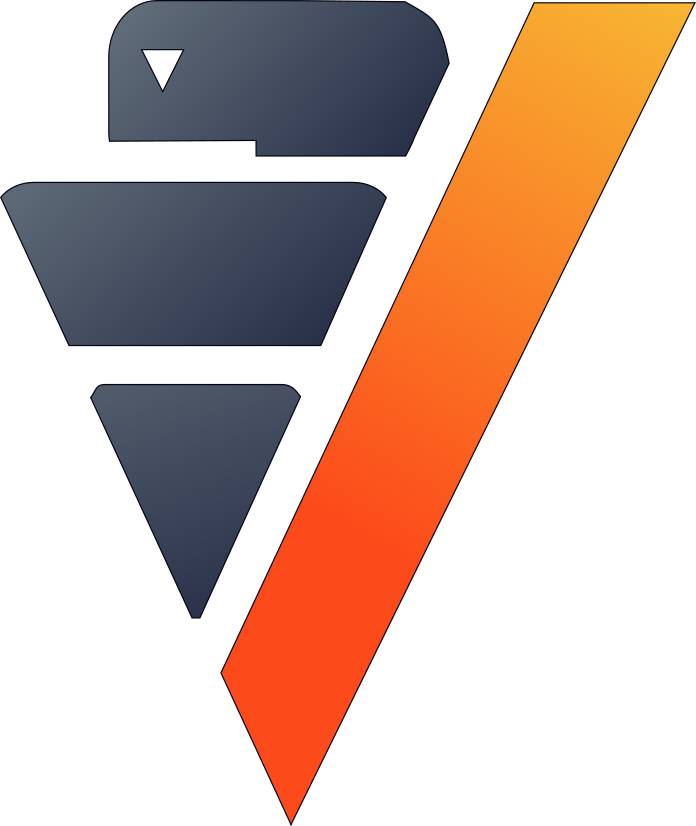

In [9]:
fights.count()

In terms of missing values, our only concern is the Pokemon's second type (Type_2_1 and Type_2_2). Since some Pokemon only have one type, these features are MNAR (missing values not at random). We can impute the missing values by creating another category.

24031 elements were filled.
23985 elements were filled.


,123Sp_Atk_diffInteger,123Speed_diffInteger,123Sp_Def_diffInteger,123Defense_diffInteger,123HP_diffInteger,123Attack_diffInteger,AbcType_1_1Varchar(20),AbcType_1_2Varchar(20),AbcType_2_1Varchar(20),AbcType_2_2Varchar(20),123WinnerInteger
1,-15,-35,0,-9,-13,-15,Grass,Fire,Poison,No,0
2,15,-52,-5,-11,-10,-32,Grass,Normal,Poison,No,0
3,-10,-31,-20,-38,-45,-43,Grass,Poison,Poison,Ground,0
4,15,-20,0,9,7,8,Grass,Fire,Poison,No,0
5,25,0,10,-1,-15,-6,Grass,Bug,Poison,Poison,0
6,0,-10,-20,-31,-45,-81,Grass,Fighting,Poison,No,0
7,0,-10,-20,-31,-45,-81,Grass,Fighting,Poison,No,0
8,0,-45,0,-6,-5,-36,Grass,Fire,Poison,No,0
9,-60,-10,0,-36,-50,-46,Grass,Grass,Poison,Psychic,0
10,30,-42,-45,-4,-5,-71,Grass,Fighting,Poison,No,0

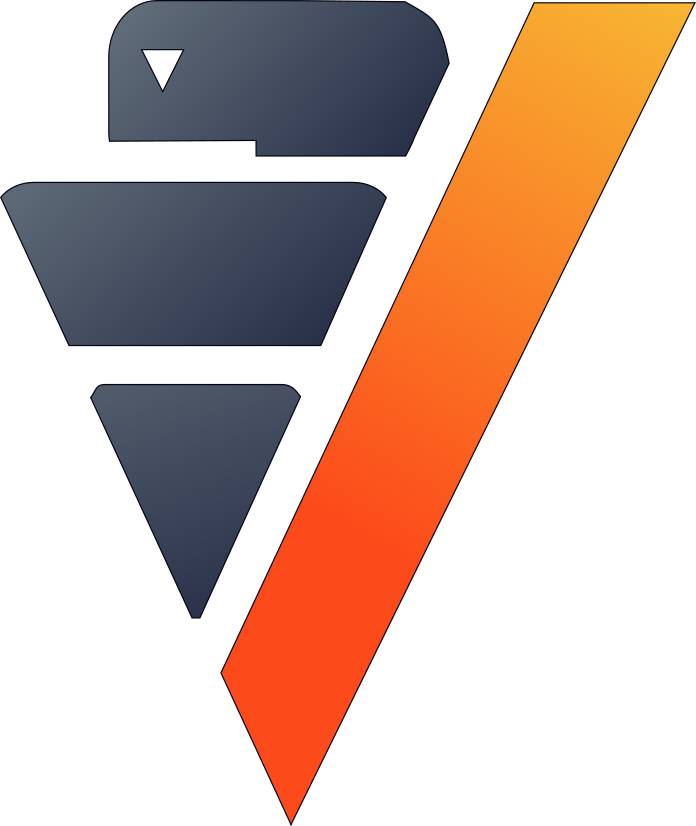

In [10]:
fights["Type_2_1"].fillna("No")
fights["Type_2_2"].fillna("No")

Let's use the current_relation method to see how our data preparation so far on the vDataFrame generates SQL code.

In [11]:
print(fights.current_relation())

(
   SELECT
     "Sp_Atk_diff",
     "Speed_diff",
     "Sp_Def_diff",
     "Defense_diff",
     "HP_diff",
     "Attack_diff",
     "Type_1_1",
     "Type_1_2",
     COALESCE("Type_2_1", 'No') AS "Type_2_1",
     COALESCE("Type_2_2", 'No') AS "Type_2_2",
     "Winner" 
   FROM
 (
   SELECT
     "Sp_Atk_diff",
     "Speed_diff",
     "Sp_Def_diff",
     "Defense_diff",
     "HP_diff",
     "Attack_diff",
     "Type_1_1",
     "Type_1_2",
     "Type_2_1",
     "Type_2_2",
     "Winner" 
   FROM
 (
   SELECT
     "Sp_Atk_diff",
     "Speed_diff",
     "Sp_Def_diff",
     "Defense_diff",
     "HP_diff",
     "Attack_diff",
     "Type_1_1",
     "Type_1_2",
     "Type_2_1",
     "Type_2_2",
     "Winner" 
   FROM
 (
   SELECT
     "Sp_Atk_1",
     "Speed_1",
     "Sp_Def_1",
     "Defense_1",
     "Type_1_1",
     "Type_2_1",
     "HP_1",
     "Attack_1",
     CASE WHEN ("Winner") = ("Second_pokemon") THEN 0 ELSE 1 END AS "Winner",
     "Second_pokemon",
     "Sp_Atk_2",
     "Speed_2",
  

VerticaPy will remember your modifications and always generate an up-to-date SQL query.

Let's look at the correlations between all the variables.

,"""Sp_Atk_diff""","""Speed_diff""","""Sp_Def_diff""","""Defense_diff""","""HP_diff""","""Attack_diff""","""Winner"""
"""Sp_Atk_diff""",1.0,0.461943085912838,0.531480722634612,0.258541100916901,0.429170933158031,0.369050252354655,0.350263540845479
"""Speed_diff""",0.461943085912838,1.0,0.285400939958828,0.0520644179605686,0.235242348315956,0.371607216354817,0.737667958118482
"""Sp_Def_diff""",0.531480722634612,0.285400939958828,1.0,0.528725698837421,0.43998773627243,0.295787218627862,0.240803911855112
"""Defense_diff""",0.258541100916901,0.0520644179605686,0.528725698837421,1.0,0.359895461198139,0.47513485539623,0.107501699533193
"""HP_diff""",0.429170933158031,0.235242348315956,0.43998773627243,0.359895461198139,1.0,0.513251151713597,0.231763909809698
"""Attack_diff""",0.369050252354655,0.371607216354817,0.295787218627862,0.47513485539623,0.513251151713597,1.0,0.361674114012681
"""Winner""",0.350263540845479,0.737667958118482,0.240803911855112,0.107501699533193,0.231763909809698,0.361674114012681,1.0

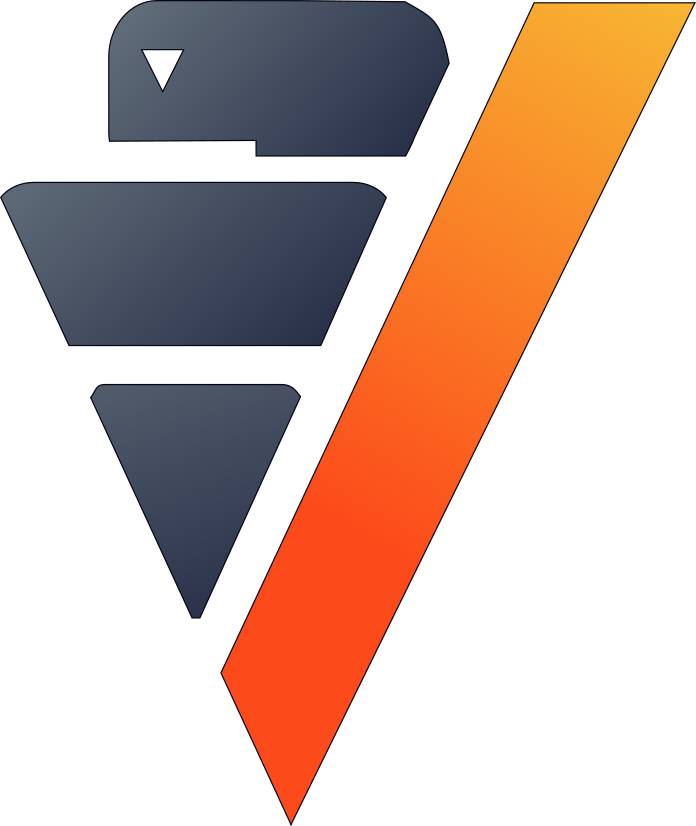

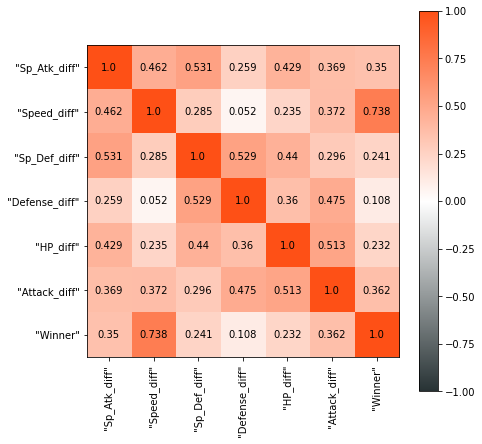

In [12]:
%matplotlib inline
fights.corr(method = "spearman")

Many variables are correlated to the response column. We have enough information to create our predictive model.

## Machine Learning

Some really important features are categorical. Random forest can handle them. Besides, we need trees deep enough to compare all the different types.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,0.9908329877342852,0.989621916144904,0.5297011880475219,0.0555187636069976,0,0.0,0,0,0.0,-0.47029881195247814,0.0,4.846796751022339
2-fold,0.9933399147888969,0.9927736374401124,0.5286570743405276,0.0456261939037781,0,0.0,0,0,0.0,-0.47134292565947244,0.0,4.647046804428101
3-fold,0.991187231642946,0.9902878648151856,0.528645207782849,0.0539573248046206,0,0.0,0,0,0.0,-0.47135479221715104,0.0,4.96301794052124
avg,0.9917867113887093,0.9908944728000674,0.5290011567236328,0.05170076077179877,0.0,0.0,0.0,0.0,0.0,-0.4709988432763672,0.0,4.81895383199056
std,0.0013567250231611022,0.0016611191155841783,0.0006062739435413665,0.005318345114688676,0.0,0.0,0.0,0.0,0.0,0.0006062739435413665,0.0,0.15981508319353024

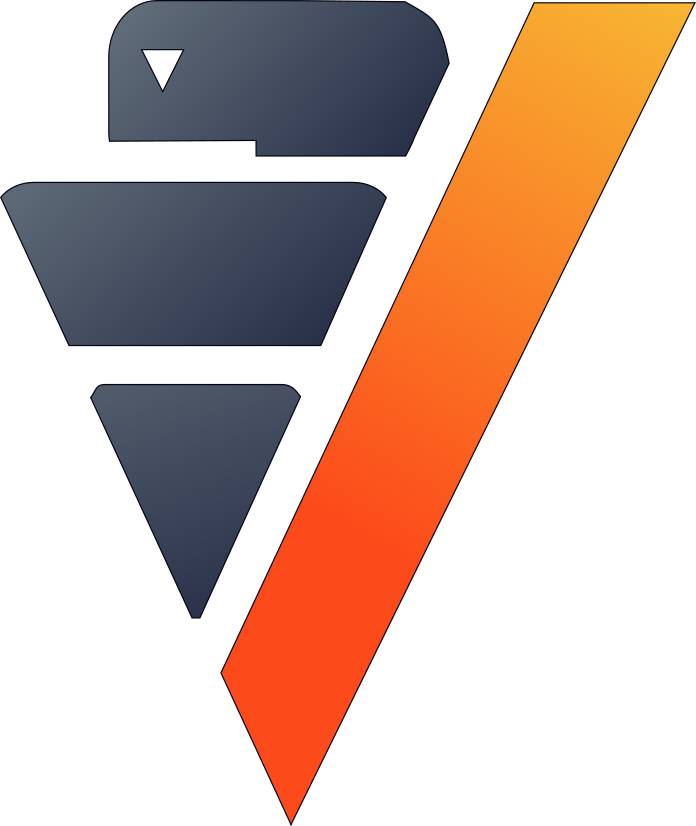

In [13]:
from verticapy.learn.ensemble import RandomForestClassifier
from verticapy.learn.model_selection import cross_validate

predictors = fights.get_columns(exclude_columns = ['Winner'])
model = RandomForestClassifier("rf_pokemon", 
                               n_estimators = 50, 
                               max_depth = 100, 
                               max_leaf_nodes = 400, 
                               nbins = 100)
cross_validate(model, fights, predictors, "Winner")

We have an excellent model with an average AUC of more than 99%. Let's create a model with the entire dataset and look at the importance of each feature.

,importance,sign
speed_diff,79.83,1
attack_diff,5.35,1
sp_atk_diff,3.33,1
type_2_2,2.2,1
type_2_1,2.17,1
type_1_1,1.73,1
type_1_2,1.63,1
hp_diff,1.57,1
sp_def_diff,1.29,1
defense_diff,0.9,1

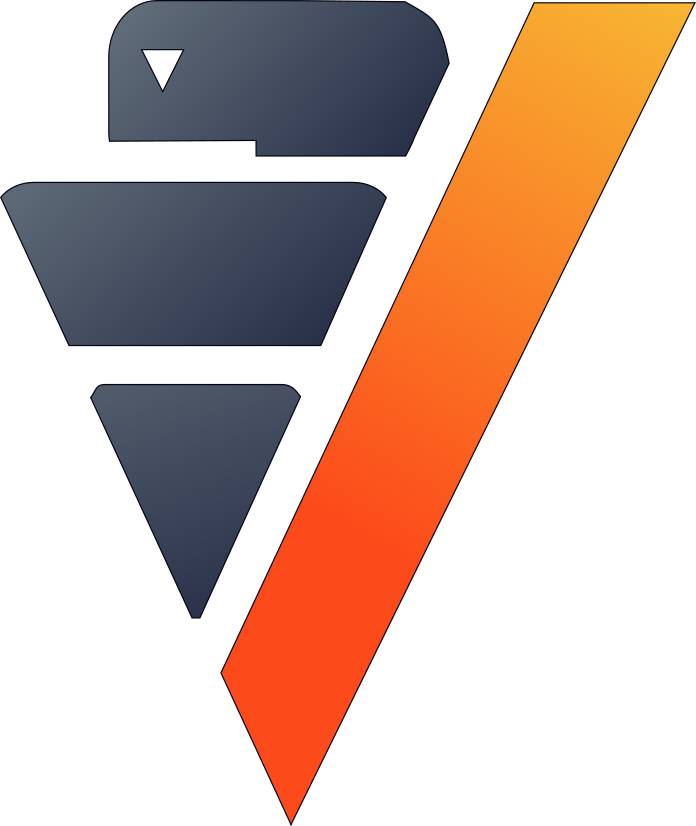

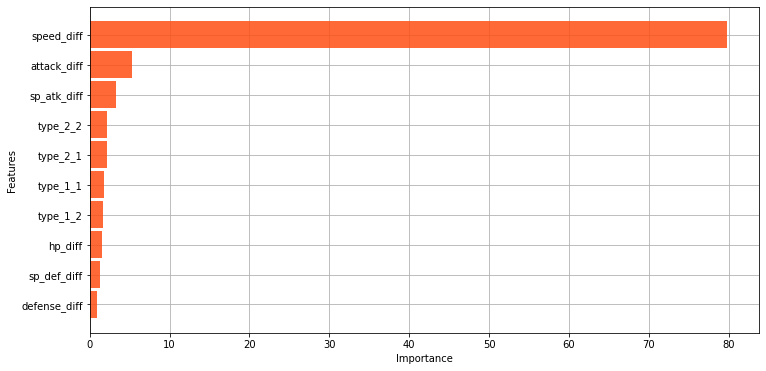

In [14]:
model.fit(fights, 
          predictors, 
          "Winner").features_importance()

Based on our model, it seems that a Pokemon's speed and attack stats are the strongest predictors for the winner of a battle.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!